## Importing Libraries

In [1]:
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from termcolor import colored
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import GRU, Dense, Dropout, GlobalMaxPooling1D, Embedding
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

## Importing Dataset

In [2]:
train_set_path = '/kaggle/input/ag-news-sinhala/ag_news_sinhala/train.csv'
test_set_path = '/kaggle/input/ag-news-sinhala/ag_news_sinhala/test.csv'

In [3]:
train_set = pd.read_csv(train_set_path)
test_set = pd.read_csv(test_set_path)

In [4]:
train_set.head()

,Unnamed: 0,Class Index,Title (English),Description (English),Title (Sinhala),Description (Sinhala)
0,0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",වෝල් වීදිය නැවතත් ධනාත්මක ආර්ථිකයක් ලබා ගත්තේය.,"නිව් යෝර්ක් (රොයිටර්) - කෙටි විකුණුම්කරුවන්, ව..."
1,1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,කාර්ලයිල් වාණිජ අභ්‍යවකාශය දෙස බලයි (රොයිටර්),රොයිටර් - පුද්ගලික ආයෝජන සමාගමක් වන Carlyle Gr...
2,2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,තෙල් සහ ආර්ථිකය,රොයිටර් - බොරතෙල් මිල ඉහළ යාම සහ ආර්ථිකය පිළිබ...
3,3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,ඉරාකය ප්‍රධාන දකුණු නල මාර්ගයෙන් (රොයිටර්) තෙල...,රොයිටර් - කැරලිකාර මිලීෂියාවකට යටිතල පහසුකම්වල...
4,4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",එක්සත් ජනපද ආර්ථිකයට (AFP) නව තර්ජනයක් එල්ල කර...,"AFP - ඉරාක ලෝක තෙල් මිල, වාර්තා පෙරලීම සහ මුදල..."


In [5]:
test_set.head()

,Unnamed: 0,Class Index,Title (English),Description (English),Title (Sinhala),Description (Sinhala)
0,0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,කතා කරලා TN විශ්‍රාම වැටුපට බයයි,Turner Newall හි කම්කරුවන් නියෝජනය කරන වෘත්තීය...
1,1,4,The Race is On: Second Private Team Sets Launc...,A second team of rocketeers competing for the ...,තරඟය ක්‍රියාත්මකයි: දෙවන පුද්ගලික කණ්ඩායම මානව...,මිලියනයක් වන අන්සාරි X ත්‍යාගය සඳහා තරඟ වදින ද...
2,2,4,Ky. Company Wins Grant to Study Peptides (AP),A company founded by a chemistry researcher at...,K. සමාගම Peptides (AP) අධ්‍යයනය සඳහා ප්‍රදානයක...,ලුයිස්විල් විශ්ව විද්‍යාලයේ රසායන විද්‍යා පර්ය...
3,3,4,Prediction Unit Helps Forecast Wildfires (AP),It's barely dawn when Mike Fitzpatrick starts ...,පුරෝකථන ඒකකය ලැව්ගිනි (AP) පුරෝකථනය කිරීමට උපක...,"මයික් ෆිට්ස්පැට්‍රික් වර්ණවත් සිතියම්, රූප සහ ..."
4,4,4,Calif. Aims to Limit Farm-Related Smog (AP),Southern California's smog-fighting agency wen...,කැලිෆෝනියාව. ගොවිපල ආශ්‍රිත දුමාරය (AP) සීමා ක...,දකුණු කැලිෆෝනියාවේ දුමාරයට එරෙහිව සටන් කිරීමේ ...


In [6]:
train_set = train_set.drop(['Unnamed: 0', 'Title (English)', 'Description (English)'], axis=1).copy()

In [7]:
train_set.head()

,Class Index,Title (Sinhala),Description (Sinhala)
0,3,වෝල් වීදිය නැවතත් ධනාත්මක ආර්ථිකයක් ලබා ගත්තේය.,"නිව් යෝර්ක් (රොයිටර්) - කෙටි විකුණුම්කරුවන්, ව..."
1,3,කාර්ලයිල් වාණිජ අභ්‍යවකාශය දෙස බලයි (රොයිටර්),රොයිටර් - පුද්ගලික ආයෝජන සමාගමක් වන Carlyle Gr...
2,3,තෙල් සහ ආර්ථිකය,රොයිටර් - බොරතෙල් මිල ඉහළ යාම සහ ආර්ථිකය පිළිබ...
3,3,ඉරාකය ප්‍රධාන දකුණු නල මාර්ගයෙන් (රොයිටර්) තෙල...,රොයිටර් - කැරලිකාර මිලීෂියාවකට යටිතල පහසුකම්වල...
4,3,එක්සත් ජනපද ආර්ථිකයට (AFP) නව තර්ජනයක් එල්ල කර...,"AFP - ඉරාක ලෝක තෙල් මිල, වාර්තා පෙරලීම සහ මුදල..."


In [8]:
test_set = test_set.drop(['Unnamed: 0', 'Title (English)', 'Description (English)'], axis=1).copy()

In [9]:
test_set.head()

,Class Index,Title (Sinhala),Description (Sinhala)
0,3,කතා කරලා TN විශ්‍රාම වැටුපට බයයි,Turner Newall හි කම්කරුවන් නියෝජනය කරන වෘත්තීය...
1,4,තරඟය ක්‍රියාත්මකයි: දෙවන පුද්ගලික කණ්ඩායම මානව...,මිලියනයක් වන අන්සාරි X ත්‍යාගය සඳහා තරඟ වදින ද...
2,4,K. සමාගම Peptides (AP) අධ්‍යයනය සඳහා ප්‍රදානයක...,ලුයිස්විල් විශ්ව විද්‍යාලයේ රසායන විද්‍යා පර්ය...
3,4,පුරෝකථන ඒකකය ලැව්ගිනි (AP) පුරෝකථනය කිරීමට උපක...,"මයික් ෆිට්ස්පැට්‍රික් වර්ණවත් සිතියම්, රූප සහ ..."
4,4,කැලිෆෝනියාව. ගොවිපල ආශ්‍රිත දුමාරය (AP) සීමා ක...,දකුණු කැලිෆෝනියාවේ දුමාරයට එරෙහිව සටන් කිරීමේ ...


## Labels

In [10]:
labels = ['World', 'Sports', 'Business & Economics', 'Science & Technology']

## Setting Columns

In [11]:
train_set.columns = ['ClassIndex', 'Title', 'Description']
test_set.columns = ['ClassIndex', 'Title', 'Description']

In [12]:
X_train = train_set['Title'] + " " + train_set['Description']
X_test = test_set['Title'] + " " + test_set['Description']

y_train = train_set['ClassIndex'].apply(lambda x: x-1).values
y_test = test_set['ClassIndex'].apply(lambda x: x-1).values

In [13]:
# Finding the max no of words in a sentence in complete data set 
maxlen = X_train.map(lambda x: len(x.split())).max()

In [14]:
print(maxlen)

166


In [15]:
X_train.head()

0    වෝල් වීදිය නැවතත් ධනාත්මක ආර්ථිකයක් ලබා ගත්තේය...
1    කාර්ලයිල් වාණිජ අභ්‍යවකාශය දෙස බලයි (රොයිටර්) ...
2    තෙල් සහ ආර්ථිකය රොයිටර් - බොරතෙල් මිල ඉහළ යාම ...
3    ඉරාකය ප්‍රධාන දකුණු නල මාර්ගයෙන් (රොයිටර්) තෙල...
4    එක්සත් ජනපද ආර්ථිකයට (AFP) නව තර්ජනයක් එල්ල කර...
dtype: object

In [16]:
X_test.head()

0    කතා කරලා TN විශ්‍රාම වැටුපට බයයි Turner Newall...
1    තරඟය ක්‍රියාත්මකයි: දෙවන පුද්ගලික කණ්ඩායම මානව...
2    K. සමාගම Peptides (AP) අධ්‍යයනය සඳහා ප්‍රදානයක...
3    පුරෝකථන ඒකකය ලැව්ගිනි (AP) පුරෝකථනය කිරීමට උපක...
4    කැලිෆෝනියාව. ගොවිපල ආශ්‍රිත දුමාරය (AP) සීමා ක...
dtype: object

In [17]:
print(y_train)

[2 2 2 ... 1 1 1]


In [18]:
print(y_test)

[2 3 3 ... 1 2 2]


## Data Distribution

**Train set**

<AxesSubplot:xlabel='ClassIndex', ylabel='count'>

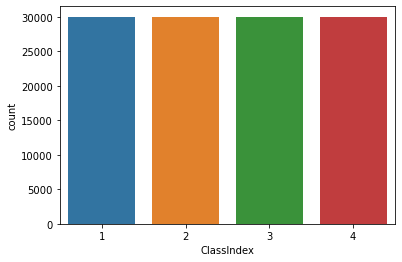

In [19]:
sns.countplot(x=train_set['ClassIndex'])

**Test set**

<AxesSubplot:xlabel='ClassIndex', ylabel='count'>

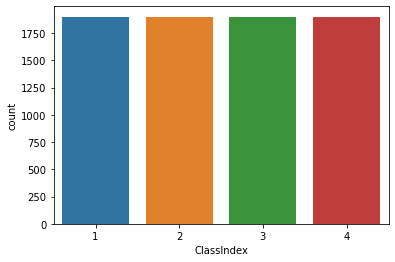

In [20]:
sns.countplot(x=test_set['ClassIndex'])

## Checking Missing Values

In [21]:
train_set.isnull().sum()

ClassIndex     0
Title          0
Description    0
dtype: int64

In [22]:
test_set.isnull().sum()

ClassIndex     0
Title          0
Description    0
dtype: int64

## Tokenization

In [23]:
vocabulary_size = 10000 # arbitrarily chosen
embed_size = 32 # arbitrarily chosen

**Creating & fitting Tokenizer**

In [24]:
sinhala_tokens = Tokenizer(num_words = vocabulary_size)

In [25]:
sinhala_tokens.fit_on_texts(X_train.values)

**Tokenizing texts**

In [26]:
X_train = sinhala_tokens.texts_to_sequences(X_train)
X_test = sinhala_tokens.texts_to_sequences(X_test)

**Padding texts**

In [27]:
X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)

## Constructing the Unidirectional GRU Model

In [28]:
model = Sequential()

# Input Layer
model.add(Embedding(vocabulary_size, embed_size, input_length = maxlen))

model.add(GRU(128, return_sequences = True)) 
model.add(GRU(64, return_sequences = True))

model.add(GlobalMaxPooling1D()) 

model.add(Dense(1024))
model.add(Dropout(0.25)) 
model.add(Dense(512))
model.add(Dropout(0.25))
model.add(Dense(256))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Dropout(0.25))

# Output Layer
model.add(Dense(4, activation = 'softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 166, 32)           320000    
_________________________________________________________________
gru (GRU)                    (None, 166, 128)          62208     
_________________________________________________________________
gru_1 (GRU)                  (None, 166, 64)           37248     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1024)              66560     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               5

## Model Architecture

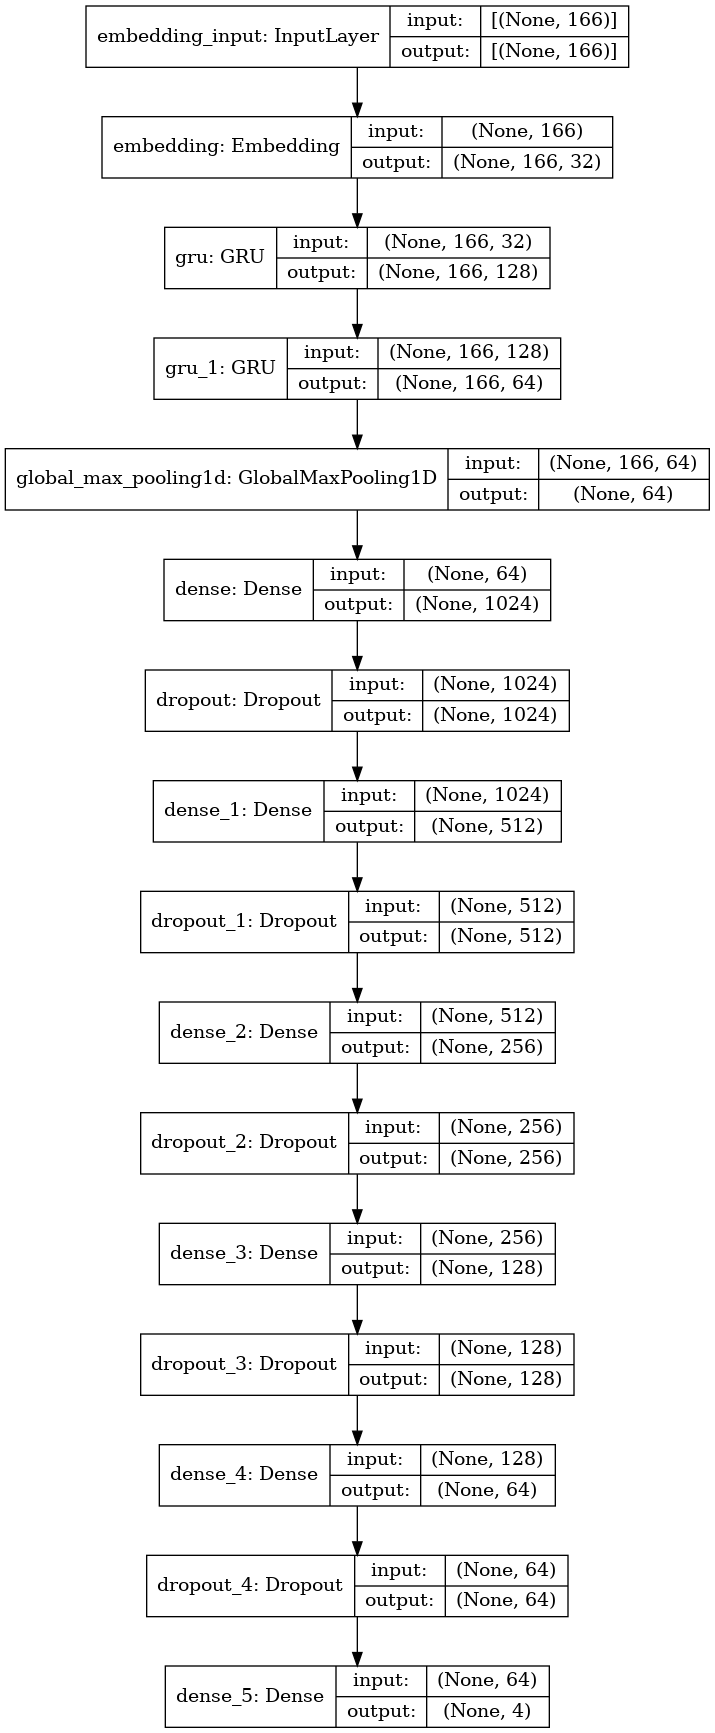

In [30]:
plot_model(model, to_file = 'model.png', show_shapes=True, show_layer_names=True)

## Model Training

**Callbacks**

In [31]:
callbacks = [
    
    EarlyStopping(
        monitor = 'val_accuracy',
        min_delta = 1e-4,
        patience = 4,
        verbose = 1
    ),
    
    ModelCheckpoint(
        filepath = 'weights.h5',
        monitor = 'val_accuracy', 
        mode = 'max', 
        save_best_only = True,
        save_weights_only = True,
        verbose = 1
    ),
    
]

**Compilling**

In [32]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy'])

**Training**

In [33]:
epochs = 20
batch_size = 256
validation_data = (X_test, y_test)

In [34]:
hist = model.fit(X_train,
                 y_train,
                 batch_size = batch_size,
                 validation_data = validation_data,
                 epochs = epochs,
                 callbacks = callbacks)

Epoch 1/20
469/469 [==============================] - 20s 31ms/step - loss: 0.4205 - accuracy: 0.8473 - val_loss: 0.3059 - val_accuracy: 0.9001

Epoch 00001: val_accuracy improved from -inf to 0.90013, saving model to weights.h5
Epoch 2/20
469/469 [==============================] - 14s 30ms/step - loss: 0.2652 - accuracy: 0.9126 - val_loss: 0.3046 - val_accuracy: 0.8996

Epoch 00002: val_accuracy did not improve from 0.90013
Epoch 3/20
469/469 [==============================] - 14s 30ms/step - loss: 0.2218 - accuracy: 0.9257 - val_loss: 0.3489 - val_accuracy: 0.8868

Epoch 00003: val_accuracy did not improve from 0.90013
Epoch 4/20
469/469 [==============================] - 14s 30ms/step - loss: 0.1872 - accuracy: 0.9356 - val_loss: 0.3241 - val_accuracy: 0.8999

Epoch 00004: val_accuracy did not improve from 0.90013
Epoch 5/20
469/469 [==============================] - 14s 30ms/step - loss: 0.1558 - accuracy: 0.9456 - val_loss: 0.3628 - val_accuracy: 0.8946

Epoch 00005: val_accuracy 

## Saving the Model

In [35]:
model.load_weights('weights.h5')
model.save('sinhala_model.h5')
model.save('sinhala_model.hdf5')

## Model Accuaracy and Loss Plots

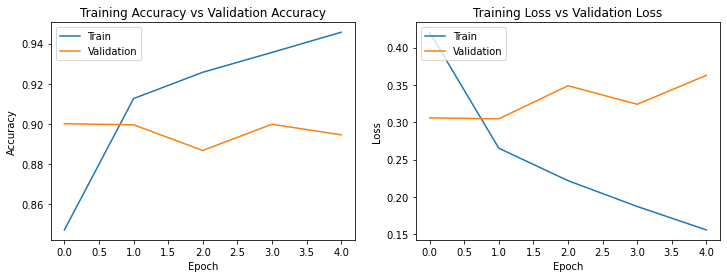

In [36]:
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(hist.history['accuracy'])
ax[0].plot(hist.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc = 'upper left')

ax[1].plot(hist.history['loss'])
ax[1].plot(hist.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

## Confusion Matrix

<Figure size 432x288 with 0 Axes>

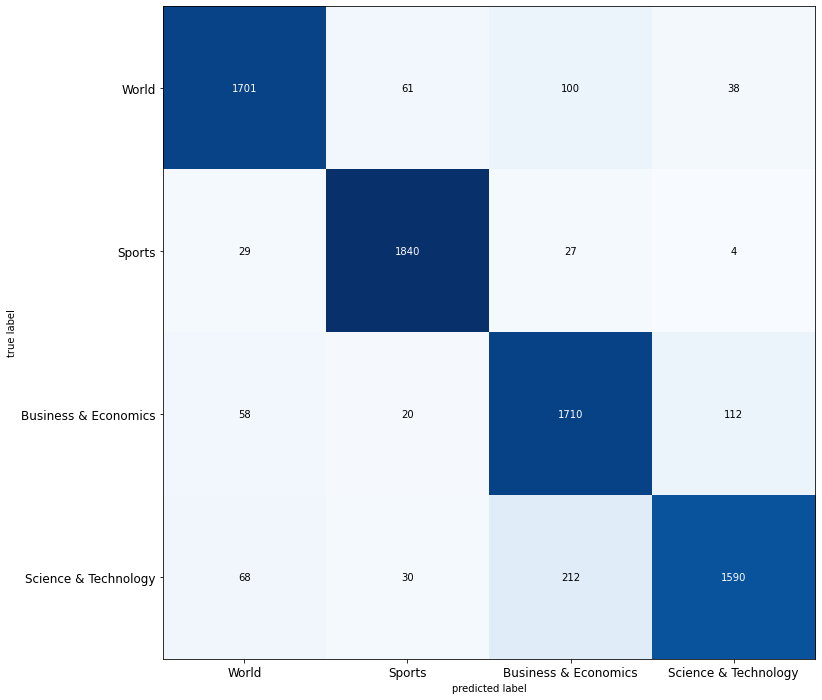

In [37]:
preds = [np.argmax(i) for i in model.predict(X_test)]

cm = confusion_matrix(y_test, preds)

plt.figure()

plot_confusion_matrix(cm, figsize = (16,12), hide_ticks = True, cmap = plt.cm.Blues)

plt.xticks(range(4), labels, fontsize = 12)
plt.yticks(range(4), labels, fontsize = 12)

plt.show()

## Recall, Precision and Accuracy

In [38]:
print("Recall of the model is {:.2f}".format(recall_score(y_test, preds, average = 'micro')))
print("Precision of the model is {:.2f}".format(precision_score(y_test, preds, average = 'micro')))
print("Accuracy of the model is {:.2f}".format(accuracy_score(y_test, preds)))

Recall of the model is 0.90
Precision of the model is 0.90
Accuracy of the model is 0.90


## Getting Preditctions

In [39]:
def modelDemo(news_text):
    
    test_seq = pad_sequences(sinhala_tokens.texts_to_sequences(news_text), maxlen = maxlen)
    test_preds = [labels[np.argmax(i)] for i in model.predict(test_seq)]
    
    for news, label in zip(news_text, test_preds):
        print('{} - {}'.format(colored(news, 'yellow'), colored(label, 'blue')))

In [40]:
news_text = [
             'T20 ලෝක කුසලානය සඳහා වන ශ්‍රී ලංකා කාන්තා සංචිතය ප්‍රකාශයට පත් කෙරේ',
             'නිදහස් සේවකයාට බදු පැනවීම: බදු අය කරන්නේ කාටද?',
             'වනජීවී වෙළඳාමෙන් වෛරස් අවදානම් පිළිබඳ නව සාක්ෂි',
             'ICC කාන්තා T20 ලෝක කුසලානය 2023 | නිල කණ්ඩායම් අනුග්‍රාහකයා හඳුන්වාදීම සහ ශ්‍රී ලංකා කණ්ඩායමේ ජර්සි එළිදැක්වීම.',
             'නිදහස් දින සැමරුම සම්බන්ධයෙන් ශ්‍රී ලංකා කතෝලික සභාව ජනපතිට බැණ වදියි',
             'IMF ආධාර වැඩසටහන ගැන SJB නායකයාගේ අනතුරු ඇඟවීම',
             '#GalaxyS23 සමඟින් ඔහුගේ වැඩිදියුණු කළ ඡායාරූප පෙන්වයි. Galaxy සමඟ JK හි ඔබ කැමතිම ඡායාරූපය කුමක්ද?',
             'Falcon 9 සිය 200 වැනි සාර්ථක මෙහෙයුම දියත් කළ අතර, තවත් SpaceX Starlink චන්ද්‍රිකා 53ක් අද උදෑසන කක්ෂයට ලබා දුන්නේය.',
             'කැලඹිලි සහිත ආර්ථික කාලවලදී, කොටස් මිලදී ගැනීම සඳහා ආන්තික ණය භාවිතා කිරීම ගැන සැලකිලිමත් වන්න',
             'ඉදිරියේදී පැවැත්වීමට නියමිත බෝඩර් ගවස්කාර් කුසලානයේ විස්තර විචාරකයෙකු ලෙස දිනේෂ් කාර්තික් කටයුතු කරනු ඇත'
            ]

In [41]:
modelDemo(news_text)

T20 ලෝක කුසලානය සඳහා වන ශ්‍රී ලංකා කාන්තා සංචිතය ප්‍රකාශයට පත් කෙරේ - Sports
නිදහස් සේවකයාට බදු පැනවීම: බදු අය කරන්නේ කාටද? - Business & Economics
වනජීවී වෙළඳාමෙන් වෛරස් අවදානම් පිළිබඳ නව සාක්ෂි - Science & Technology
ICC කාන්තා T20 ලෝක කුසලානය 2023 | නිල කණ්ඩායම් අනුග්‍රාහකයා හඳුන්වාදීම සහ ශ්‍රී ලංකා කණ්ඩායමේ ජර්සි එළිදැක්වීම. - Sports
නිදහස් දින සැමරුම සම්බන්ධයෙන් ශ්‍රී ලංකා කතෝලික සභාව ජනපතිට බැණ වදියි - World
IMF ආධාර වැඩසටහන ගැන SJB නායකයාගේ අනතුරු ඇඟවීම - World
#GalaxyS23 සමඟින් ඔහුගේ වැඩිදියුණු කළ ඡායාරූප පෙන්වයි. Galaxy සමඟ JK හි ඔබ කැමතිම ඡායාරූපය කුමක්ද? - Science & Technology
Falcon 9 සිය 200 වැනි සාර්ථක මෙහෙයුම දියත් කළ අතර, තවත් SpaceX Starlink චන්ද්‍රිකා 53ක් අද උදෑසන කක්ෂයට ලබා දුන්නේය. - Science & Technology
කැලඹිලි සහිත ආර්ථික කාලවලදී, කොටස් මිලදී ගැනීම සඳහා ආන්තික ණය භාවිතා කිරීම ගැන සැලකිලිමත් වන්න - Business & Economics
ඉදිරියේදී පැවැත්වීමට නියමිත බෝඩර් ගවස්කාර් කුසලානයේ විස්තර විචාරකයෙකු ලෙස දිනේෂ් කාර්තික් කටයුතු කරනු ඇත - Sports


In [42]:
news_text = [
                'මෙවර විස්සයි විස්ස ලෝක කුසලාන කාන්තා ක්‍රිකට් තරගාවලියට සහභාගී වන ශ්‍රි ලංකා කාන්තා ක්‍රිකට් කණ්ඩායම අද අලුයම දකුණු අප්‍රිකාව බලා පිටත්ව ගොස් තිබේ.',
                '2023 පළාත් පාලන මැතිවරණයට අදාළව තැපැල් ඡන්දය සලකුණු කිරීමේ දින මැතිවරණ කොමිසම විසින් ප්‍රකාශයට පත්කර තිබේ.',
                'දිවයින හරහා ගමන් කරමින් පැවති පීඩන අවපාතය ඊයේ රාත්‍රියේ අඩු පීඩන කලාපයක් බවට පත්ව දිවයිනෙන් ඉවතට ගමන්කර ඇති බව කාලගුණවිද්‍යා දෙපාර්තමේන්තුව පවසයි.'
                'රජයේ නව බදු ප්‍රතිපත්තියට එරෙහිව කටුනායක බණ්ඩාරනායක ජාත්‍යන්තර ගුවන් තොටුපොළේ වෘත්තිය සමිති නියෝජිතයින් අද (02) දහවල් කෑම පැයේදී විරෝධතාවයේ නිරතවිය.',
                'පැරිස් සමාජයට අයත් ණයහිමි රටවල් ජාත්‍යන්තර මූල්‍ය අරමුදලෙන් ශ්‍රී ලංකාවට ණය පහසුකම ලබාගැනීම සඳහා අදාළ ණය සහතිකය කඩිනමින් ප්‍රකාශයට පත්කිරීමට නියමිත බව රොයිටර්ස් පුවත් සේවය අද (02) අනාවරණ කළේය.',
                'ඇපල් සහ ගූගල් සමාගම් මගින් පාලනය කරන "Play Store"වලින් ටික් ටොක් ඉවත් කරන ලෙසට අමෙරිකානු සෙනෙට් සභිකයෙක් ඉල්ලීමක් කර තිබේ.',
                'කුරුණෑගල මහ නගර සභාවේ නව නගරාධිපති ධුරය සඳහා සමගි ජනබලවේගයේ පක්ෂයේ සුමේද අරුණ ශාන්ත මහතා තේරීපත්ව තිබේ.',
                'තම කණ්ඩායමේ ක්‍රීඩිකාවන් උපරිම දක්ෂතාවල සිටියොත් ලෝකයේ ඕනෑම කණ්ඩායමක් පරාජය කළ හැකි බව ශ්‍රී ලංකා කණ්ඩායමේ නායිකා චමරි අතපත්තු පැවසුවාය.',
                'විදෙස් ජාතික නැවියන් දෙදෙනෙක් හදිසියේ මියයෑමේ සිදුවීමක් පිළිබඳ ගාල්ල වරාය පොලීසියට පැමිණිල්ලක් ලැබී තිබේ.',
                'ලෝක තෙත්බිම් දිනය අදට (02) යෙදී තිබේ.',
                'නිරිතදිග බෙංගාල බොක්ක මුහුදු ප්‍රදේශයේ පැවති පීඩන අවපාතය නැගෙනහිර වෙරළ දෙසින් දිවයිනයට ඇතුළු වී ශ්‍රී ලංකාව හරහා ගමන් කරමින් පවතී.',
                'අද (1) මධ්‍යම රාත්‍රියේ සිට ක්‍රියාත්මක වන පරිදි ඔක්ටේන් 92 වර්ගයේ පෙට්‍රල් ලීටරයක මිල රුපියල් 30කින් ඉහළ දමා ඇති බව ලංකා ඛනිජ තෙල් නීතිගත සංස්ථාව පවසයි.',
                'ජාත්‍යන්තර මූල්‍ය අරමුදලේ මූල්‍ය පහසුකම මෙරටට ලබාගැනීම සඳහා චීනය ලබාදී ඇති ණය සහතිකය ප්‍රමාණවත් නොවන බව අමෙරිකානු රාජ්‍ය දෙපාර්තමේන්තුවේ දේශපාලන කටයුතු පිළිබඳ සහකාර රාජ්‍ය ලේකම් වික්ටෝරියා නූලන්ඩ් මහත්මිය පවසයි.'
            ]

In [43]:
modelDemo(news_text)

මෙවර විස්සයි විස්ස ලෝක කුසලාන කාන්තා ක්‍රිකට් තරගාවලියට සහභාගී වන ශ්‍රි ලංකා කාන්තා ක්‍රිකට් කණ්ඩායම අද අලුයම දකුණු අප්‍රිකාව බලා පිටත්ව ගොස් තිබේ. - Sports
2023 පළාත් පාලන මැතිවරණයට අදාළව තැපැල් ඡන්දය සලකුණු කිරීමේ දින මැතිවරණ කොමිසම විසින් ප්‍රකාශයට පත්කර තිබේ. - World
දිවයින හරහා ගමන් කරමින් පැවති පීඩන අවපාතය ඊයේ රාත්‍රියේ අඩු පීඩන කලාපයක් බවට පත්ව දිවයිනෙන් ඉවතට ගමන්කර ඇති බව කාලගුණවිද්‍යා දෙපාර්තමේන්තුව පවසයි.රජයේ නව බදු ප්‍රතිපත්තියට එරෙහිව කටුනායක බණ්ඩාරනායක ජාත්‍යන්තර ගුවන් තොටුපොළේ වෘත්තිය සමිති නියෝජිතයින් අද (02) දහවල් කෑම පැයේදී විරෝධතාවයේ නිරතවිය. - Business & Economics
පැරිස් සමාජයට අයත් ණයහිමි රටවල් ජාත්‍යන්තර මූල්‍ය අරමුදලෙන් ශ්‍රී ලංකාවට ණය පහසුකම ලබාගැනීම සඳහා අදාළ ණය සහතිකය කඩිනමින් ප්‍රකාශයට පත්කිරීමට නියමිත බව රොයිටර්ස් පුවත් සේවය අද (02) අනාවරණ කළේය. - Business & Economics
ඇපල් සහ ගූගල් සමාගම් මගින් පාලනය කරන "Play Store"වලින් ටික් ටොක් ඉවත් කරන ලෙසට අමෙරිකානු සෙනෙට් සභිකයෙක් ඉල්ලීමක් කර තිබේ. - Science & Technology
කුරුණෑගල මහ නගර සභාවේ නව නගරාධිපති ධුරය සඳහා සමග